In [22]:
%matplotlib inline
from __future__ import print_function

try:
    xrange
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
# Đọc dữ liệu từ tệp CSV
wholesale_data = pd.read_csv('E:/ML/Wholesale_customers_data.csv')

# Chọn các cột quan tâm
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
dataset_for_cl = wholesale_data[cols]

# Chuẩn hóa dữ liệu
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

In [2]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance, covariance],
           [covariance, variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

In [3]:
cluster1 = generate_2dim_normal(mean=[0, 8], variance=1,
                                covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean=[-1, 0], variance=1,
                                covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean=[10, 10], variance=1,
                                covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean=[5, 5.5], variance=0.8,
                                covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

Text(0, 0.5, 'x2')

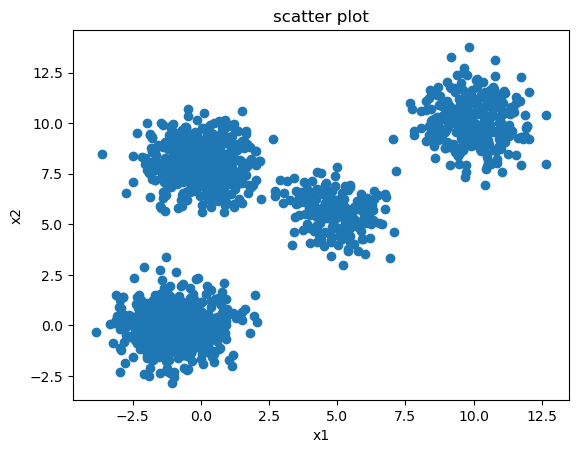

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [5]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)

In [6]:
km.fit(data)

KMeans(n_clusters=4, n_init=10)

In [7]:
cluster_labels = km.predict(data)

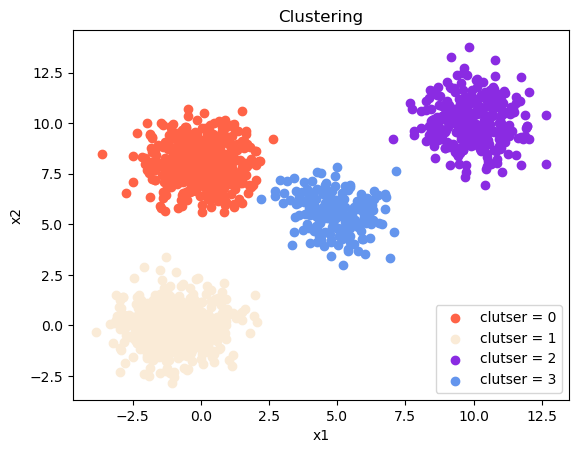

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']

cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

In [9]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)

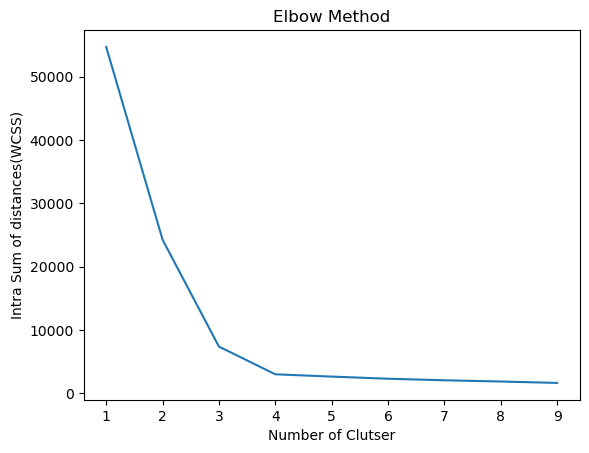

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

In [11]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)

In [12]:
silhouette_avg = silhouette_score(data, cluster_labels)

In [13]:
each_silhouette_score = silhouette_samples(data, cluster_labels,
                                           metric='euclidean')

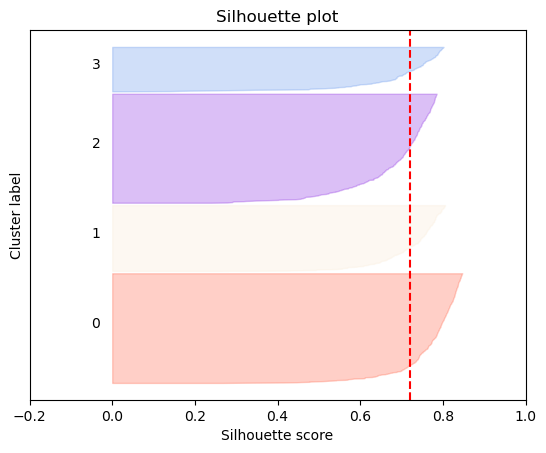

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

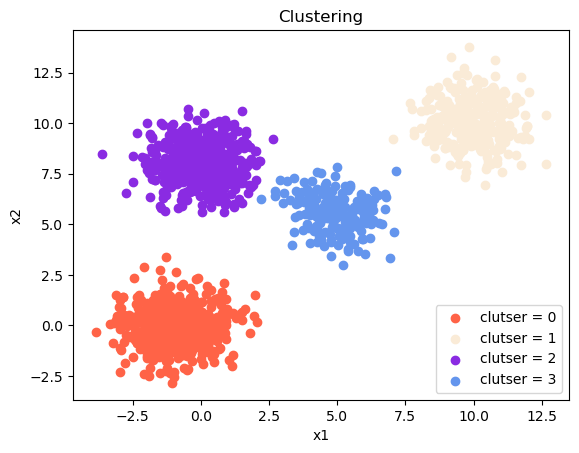

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

In [16]:
wholsesale_data = pd.read_csv('E:/ML/Wholesale_customers_data.csv')

In [17]:
wholsesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
        'Delicassen']

In [19]:
dataset_for_cl = wholsesale_data[cols]
dataset_for_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
# scaler = StandardScaler()
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

In [21]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset_for_cl)
    intra_sum_of_square_list.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

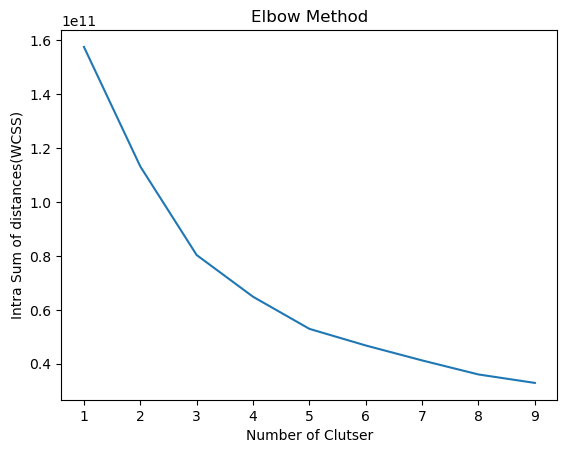

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


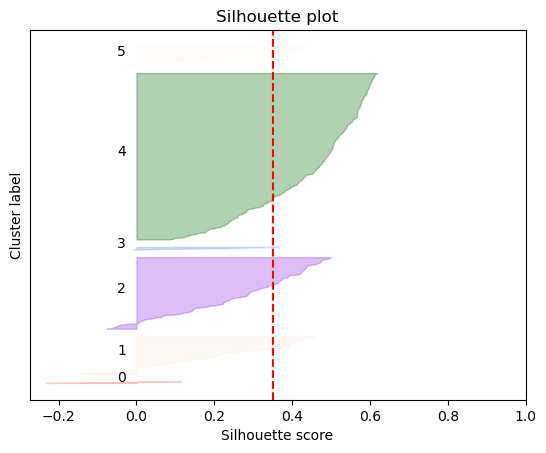

In [24]:
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset_for_cl_scaled)
cluster_labels = km.predict(dataset_for_cl_scaled)

silhouette_avg = silhouette_score(dataset_for_cl_scaled, cluster_labels)

each_silhouette_score = silhouette_samples(dataset_for_cl_scaled,
                                           cluster_labels, metric='euclidean')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

y_lower = 10

for i in range(n_clusters):
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.540090,0.409812,0.186621,0.625102,0.052735,0.431777
1,0.308166,0.063198,0.059393,0.096120,0.020464,0.043061
2,0.053828,0.115156,0.135542,0.025315,0.123568,0.034279
3,0.228290,0.591317,0.662559,0.043306,0.734176,0.056500
4,0.081563,0.034285,0.034057,0.046199,0.017011,0.020055
5,0.056777,0.234002,0.285775,0.030244,0.320392,0.054737


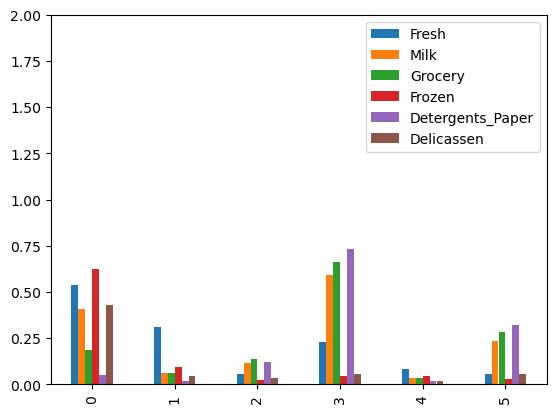

In [25]:
km_centers = pd.DataFrame(km.cluster_centers_, columns=cols)
km_centers.plot.bar(ylim=[0, 2], fontsize=10)
km_centers